# Ted Talks | Modeling

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeClassifierCV
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

%matplotlib inline
plt.style.use('ggplot')

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load data and make into datafame
df = pd.read_csv("../ga_tedtalks/ted_main.csv")

In [3]:
#review dataset
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
#review shape of dataset
df.shape

(2550, 17)

In [5]:
#review columns to consider features and prediction questions
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [6]:
#count the number of missing values
df.isnull().sum()
#there are only 6 missing columns, that is great!

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

### Tags


tags: The themes associated with the talk. #count vectorizer 

In [7]:
df.tags.head(10)

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
5    ['business', 'culture', 'entertainment', 'goal...
6    ['Christianity', 'God', 'atheism', 'comedy', '...
7    ['architecture', 'collaboration', 'culture', '...
8    ['God', 'TED Brain Trust', 'atheism', 'brain',...
9    ['Christianity', 'God', 'culture', 'happiness'...
Name: tags, dtype: object

In [8]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
# #turn tags into dummy variables
# #narrow down to top 100 tags
# tags = df.tags

# countv = CountVectorizer(max_features=100) #max_features=100

# tag_dtm = countv.fit_transform(tags)

In [10]:
# tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
# # tag_df.head()

# Word Cloud of Tags

In [11]:
from wordcloud import WordCloud, STOPWORDS


In [14]:
corpus = ' '.join(df.tags)
corpus = corpus.replace('.', '. ')

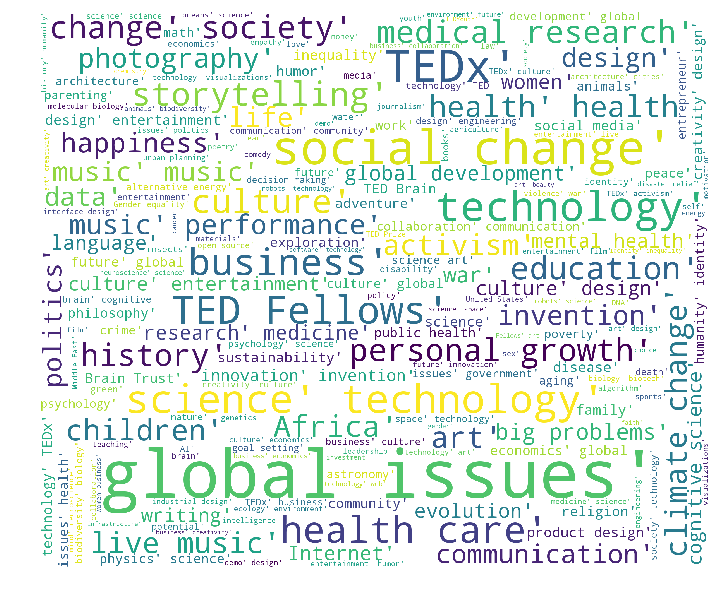

In [108]:
wordcloud = WordCloud(stopwords=STOPWORDS, \
                      background_color='white', \
                      width=2400,\
                      height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Rating Column - Setting up Dataset by Rank

Adding a rating column to better visualize data and do comparisons

In [16]:
df_ordered = df[["title","views","duration","comments","languages","num_speaker","film_date", "tags"]].sort_values('views', ascending=False)
df_ordered.head()

,title,views,duration,comments,languages,num_speaker,film_date,tags
0,Do schools kill creativity?,47227110,1164,4553,60,1,1140825600,"['children', 'creativity', 'culture', 'dance',..."
1346,Your body language may shape who you are,43155405,1262,2290,51,1,1340668800,"['body language', 'brain', 'business', 'psycho..."
677,How great leaders inspire action,34309432,1084,1930,45,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
837,The power of vulnerability,31168150,1219,1927,52,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi..."
452,10 things you didn't know about orgasm,22270883,1003,354,37,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie..."


In [17]:
df_rank = df_ordered['views'].rank(axis=0, method='first', ascending=False)

In [18]:
df_rank.head()

0       1.0
1346    2.0
677     3.0
837     4.0
452     5.0
Name: views, dtype: float64

In [19]:
df["rank"] = df_rank = df_ordered['views'].rank(axis=0, method='first', ascending=False)

In [20]:
df_ordered['rank'] = df['rank'].rank(ascending=True)

In [21]:
df_ordered.head()

,title,views,duration,comments,languages,num_speaker,film_date,tags,rank
0,Do schools kill creativity?,47227110,1164,4553,60,1,1140825600,"['children', 'creativity', 'culture', 'dance',...",1.0
1346,Your body language may shape who you are,43155405,1262,2290,51,1,1340668800,"['body language', 'brain', 'business', 'psycho...",2.0
677,How great leaders inspire action,34309432,1084,1930,45,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh...",3.0
837,The power of vulnerability,31168150,1219,1927,52,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi...",4.0
452,10 things you didn't know about orgasm,22270883,1003,354,37,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie...",5.0


In [22]:
# df.plot(kind = 'scatter', x = 'duration', y = 'views', s = 50, figsize = (8,8))

In [23]:
#lm plot with seaborn and doing a regression line #george suggestion

In [24]:
# sns.lmplot(x = "duration", y = "views", data = df_ordered, x_estimator=np.mea)

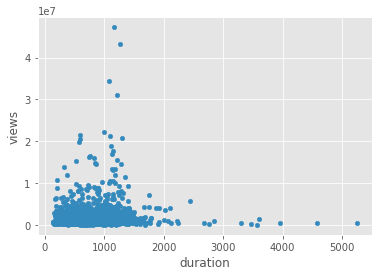

In [25]:
df.plot(kind = 'scatter', x = 'duration', y ='views')

# Tag - add as dummy varible

In [26]:
df_ordered.tags.head(10)

0       ['children', 'creativity', 'culture', 'dance',...
1346    ['body language', 'brain', 'business', 'psycho...
677     ['TEDx', 'business', 'entrepreneur', 'leadersh...
837     ['TEDx', 'communication', 'culture', 'depressi...
452     ['books', 'culture', 'history', 'humor', 'scie...
1776                       ['culture', 'sound', 'speech']
201     ['biology', 'brain', 'consciousness', 'global ...
5       ['business', 'culture', 'entertainment', 'goal...
2114    ['comedy', 'communication', 'curiosity', 'humo...
1416    ['TEDx', 'beauty', 'culture', 'fashion', 'phot...
Name: tags, dtype: object

In [27]:
tags = df_ordered.tags

countv = CountVectorizer(max_features=100) #top 100 tags used

tag_dtm = countv.fit_transform(tags)

In [28]:
tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
tag_df.head()

,activism,africa,animals,architecture,art,beauty,big,biodiversity,biology,biotech,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
tag_df.shape

(2550, 100)

In [30]:
#top tags used for ted talks
# tag_df.sum().sort_values(ascending=False)

In [31]:
df_ordered_tags = pd.concat([ df_ordered, tag_df], axis = 1)

In [32]:
df_data = df_ordered_tags.drop(['tags', 'title', 'rank', 'film_date'], axis = 1)

In [33]:
df_data.head()

,views,duration,comments,languages,num_speaker,activism,africa,animals,architecture,art,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,47227110,1164,4553,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,977,265,43,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,1286,124,26,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1697550,1116,200,35,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12005869,1190,593,48,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_data.shape

(2550, 105)

# Num_Speaker - add as dummy varible

In [35]:
speakers = pd.get_dummies(df_ordered.num_speaker)

In [36]:
df_dataset = pd.concat([speakers, df_data], axis = 1)

In [37]:
df_dataset.drop("num_speaker", axis = 1).head()  #remove num_speakers since we have dummies

,1,2,3,4,5,views,duration,comments,languages,activism,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,1,0,0,0,0,47227110,1164,4553,60,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,3200520,977,265,43,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1636292,1286,124,26,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1697550,1116,200,35,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,12005869,1190,593,48,0,...,0,0,0,0,0,0,0,0,0,1


### Data with select features to view on linear regression model - LANGUAGES


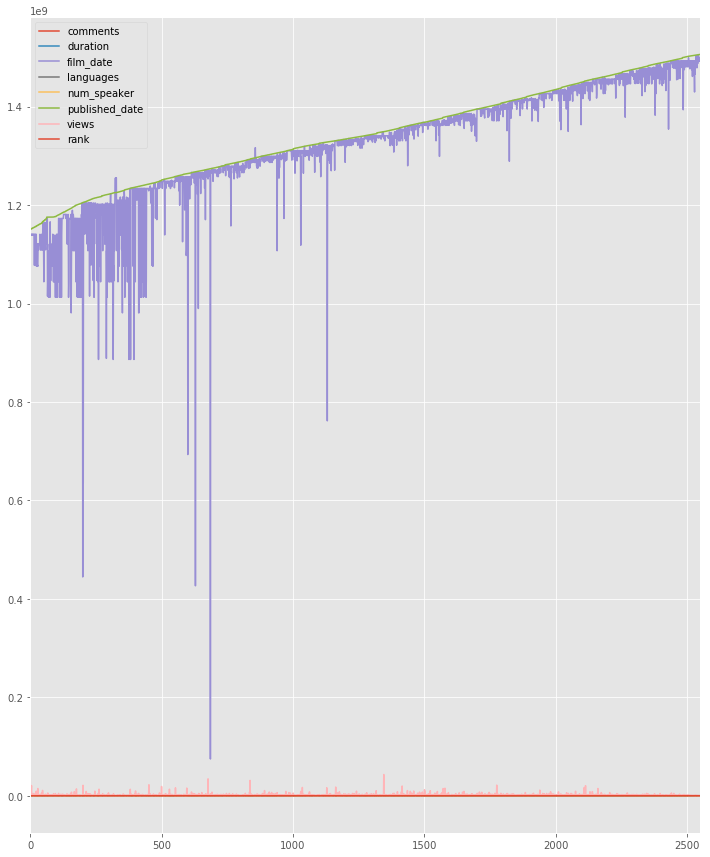

In [38]:
df.plot(figsize = (12,15))  #need to check out!!!
# # df.plot(kind = 'scatter', x = 'duration', y = 'views', s = 50, figsize = (8,8))

In [39]:
df.languages.sum()

69682

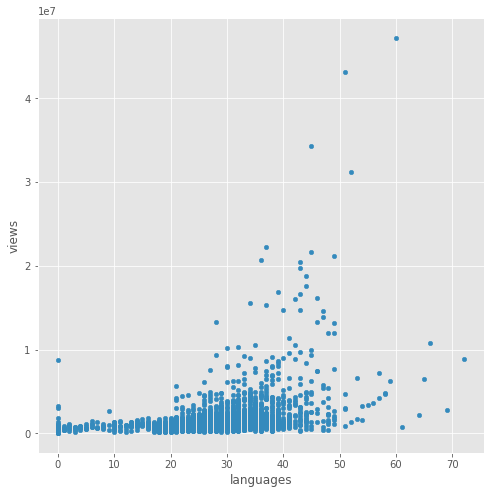

In [40]:
df.plot(kind = 'scatter', x = 'languages', y = 'views', figsize = (8,8) )

In [106]:
df_ordered.head()

,title,views,duration,comments,languages,num_speaker,film_date,tags,rank
0,Do schools kill creativity?,47227110,1164,4553,60,1,1140825600,"['children', 'creativity', 'culture', 'dance',...",1.0
1346,Your body language may shape who you are,43155405,1262,2290,51,1,1340668800,"['body language', 'brain', 'business', 'psycho...",2.0
677,How great leaders inspire action,34309432,1084,1930,45,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh...",3.0
837,The power of vulnerability,31168150,1219,1927,52,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi...",4.0
452,10 things you didn't know about orgasm,22270883,1003,354,37,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie...",5.0


In [42]:
df_languages = df_ordered.drop(["title","duration","comments","num_speaker","film_date","tags","rank"], axis = 1)

In [43]:
df.languages.tail()

2545    4
2546    3
2547    1
2548    1
2549    1
Name: languages, dtype: int64

In [44]:
X = df_languages.drop("views", axis=1) #predictors
y = df_languages["views"] #target variable

In [45]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [46]:
print (X_train.shape)
print (y_train.shape)

(637, 1)
(637,)


In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

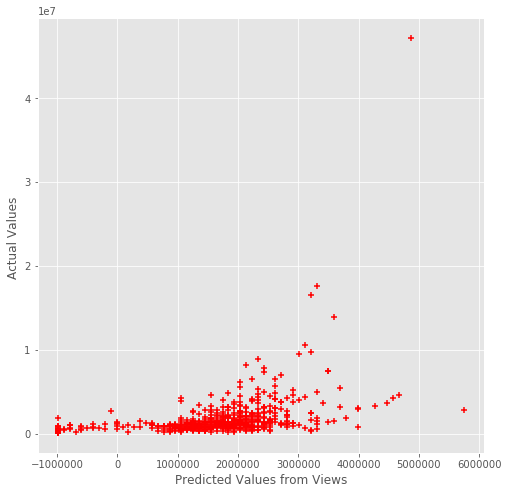

NameError: name 'score' is not defined

In [48]:
predictions = lm.predict(X_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()


lm_r2_train = lm.score(X_train, y_train)
lm_r2_test = lm.score(X_test, y_test)


print ("score: ", score)
print ("R2 on train: {}".format(lm_r2_train))
print ("R2 on test: {}".format(lm_r2_test))

### Data with select features to view on linear regression model - SPEAKERS


In [49]:
speakers = pd.get_dummies(df_ordered.num_speaker)

In [50]:
speaker_views = pd.concat([speakers, df_ordered.views], axis = 1)

In [51]:
# speaker_views

In [52]:
# df_speakers = df_ordered.drop(["title","duration","comments","film_date","tags","rank"], axis = 1)

In [53]:
X = speaker_views.drop("views", axis=1) #predictors
y = speaker_views["views"] #target variable

In [54]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [55]:
print (X_train.shape)
print (y_train.shape)

(637, 5)
(637,)


In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

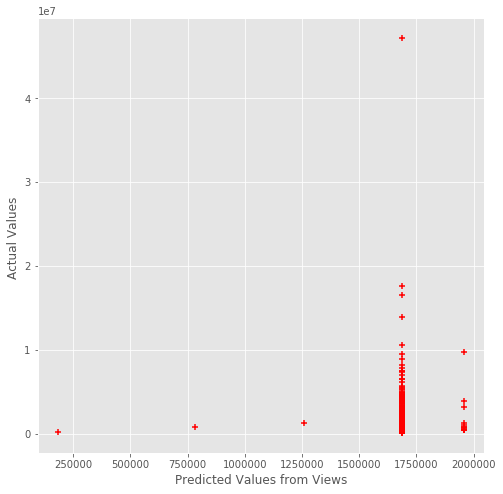

NameError: name 'score' is not defined

In [57]:
predictions = lm.predict(X_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()


lm_r2_train = lm.score(X_train, y_train)
lm_r2_test = lm.score(X_test, y_test)


print ("score: ", score)
print ("R2 on train: {}".format(lm_r2_train))
print ("R2 on test: {}".format(lm_r2_test))

### Data with select features to view on linear model - COMMENTS


In [58]:
df_comments = df_ordered.drop(["title","duration","num_speaker","film_date","tags","rank"], axis = 1)

In [59]:
df_comments.head()

,views,comments,languages
0,47227110,4553,60
1346,43155405,2290,51
677,34309432,1930,45
837,31168150,1927,52
452,22270883,354,37


In [60]:
X = df_comments.drop("views", axis=1) #predictors
y = df_comments["views"] #target variable

In [61]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [62]:
print (X_train.shape)
print (y_train.shape)

(637, 2)
(637,)


In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

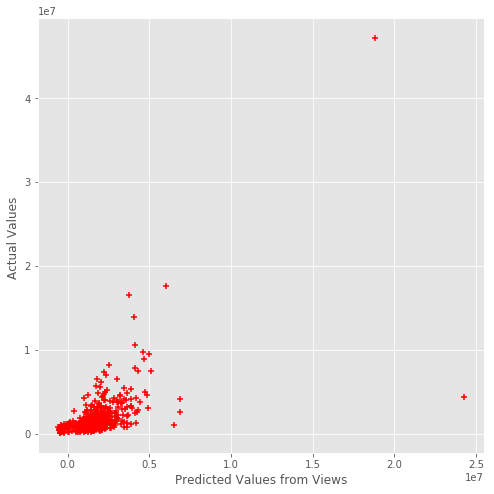

NameError: name 'score' is not defined

In [64]:
predictions = lm.predict(X_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

### Data with select features to view on linear model - DURATION


In [65]:
df_duration = df_ordered.drop(["title","comments","num_speaker","film_date","tags","rank"], axis = 1)

In [66]:
df_duration.head()

,views,duration,languages
0,47227110,1164,60
1346,43155405,1262,51
677,34309432,1084,45
837,31168150,1219,52
452,22270883,1003,37


In [67]:
X = df_duration.drop("views", axis=1) #predictors
y = df_duration["views"] #target variable

In [68]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [69]:
print (X_train.shape)
print (y_train.shape)

(637, 2)
(637,)


In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

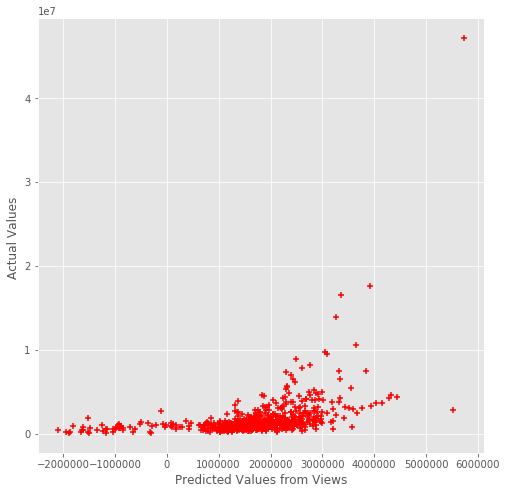

NameError: name 'score' is not defined

In [71]:
predictions = lm.predict(X_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

### Data with select features to view on linear model - TAGS


In [72]:
# df_duration = df_data.drop(["duration"], axis = 1)

In [73]:
df_tags_only = df_data.drop(["duration", "comments", "num_speaker"], axis = 1)

In [74]:
df_tags_only.head()

,views,languages,activism,africa,animals,architecture,art,beauty,big,biodiversity,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,47227110,60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,26,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1697550,35,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12005869,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
X = df_tags_only.drop("views", axis=1) #predictors
y = df_tags_only["views"] #target variable

In [76]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [77]:
print (X_train.shape)
print (y_train.shape)

(637, 101)
(637,)


In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

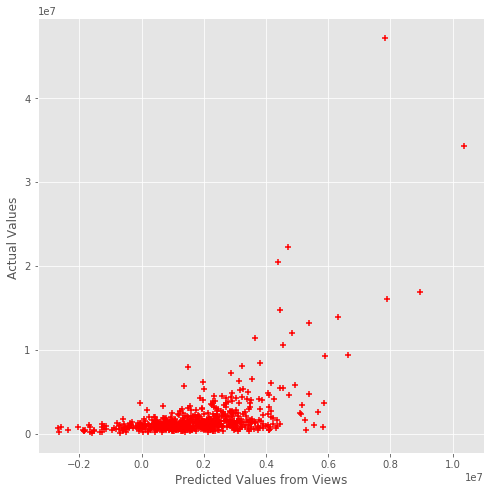

NameError: name 'score' is not defined

In [79]:
predictions = lm.predict(X_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

# Linear Regression Model on All Selected Features



In [80]:
X = df_data.drop("views", axis=1) #predictors
y = df_data["views"] #target variable

In [81]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.75)


In [82]:
assert X.shape[0] == y.shape[0]  #check that they are the same

In [83]:
print (X_train.shape)
print (y_train.shape)

(637, 104)
(637,)


In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

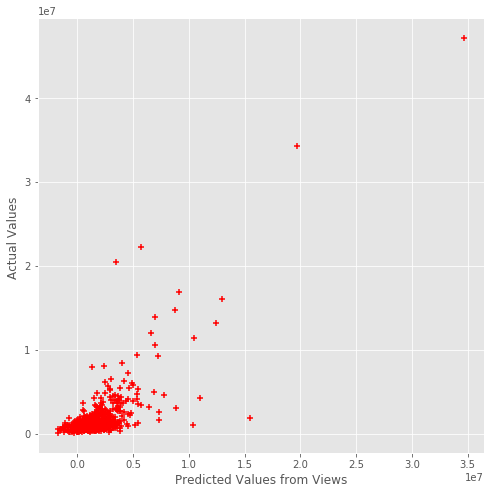

NameError: name 'score' is not defined

In [85]:
predictions = lm.predict(X_train)
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

In [ ]:
# # sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)[source]
# sklearn.metrics.mean_squared_error(y_test, predictions)

# Regression plots of features

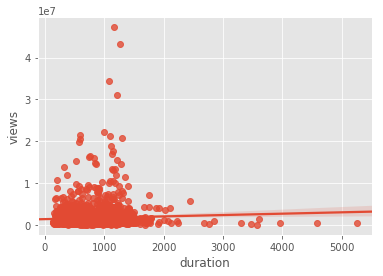

In [86]:
sns.regplot(x="duration", y="views", data=df_data)

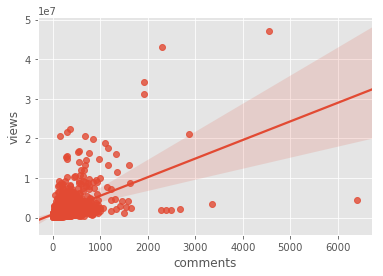

In [87]:
sns.regplot(x="comments", y="views", data=df_data)

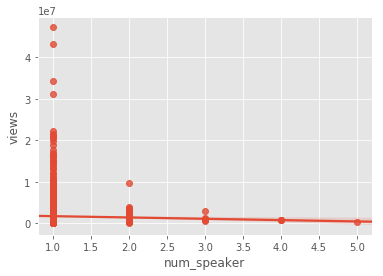

In [88]:
sns.regplot(x="num_speaker", y="views", data=df_data)

In [89]:
test1 = df_tags_only.drop("views", axis = 1)

In [90]:
tag_sum = test1.sum(axis = 1)

In [91]:
tag_count_views = pd.concat([tag_sum, df_ordered.views], axis = 1)
# = pd.concat([ df_ordered, tag_df], axis = 1)

In [92]:
tag_count_views.head()


,0,views
0,64,47227110
1,47,3200520
2,29,1636292
3,43,1697550
4,53,12005869


In [93]:
# sns.regplot(x = 0, y = "views", data=tag_count_views) 

# Using Ridge Model on All Selected Features


In [94]:
y = df_data["views"] #target variable
X = df_data.drop("views", axis=1) #predictors

In [95]:
df_data.views.shape

(2550,)

In [96]:
print(X.shape)
y.shape

(2550, 104)


(2550,)

In [97]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.80)

assert X.shape[0] == y.shape[0]  #check that they are the same

print (X_train.shape)
print (y_train.shape)

(510, 104)
(510,)


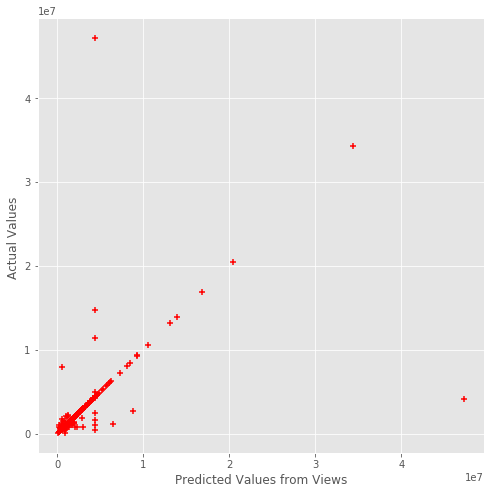

score:  0.884313725490196


In [98]:
# TRAINING SET
lmr = RidgeClassifierCV()

lmr.fit(X, y) 

train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

predictions = lmr.predict(X_train)
score = lmr.score(X_train, y_train)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()


print ("score: ", score)

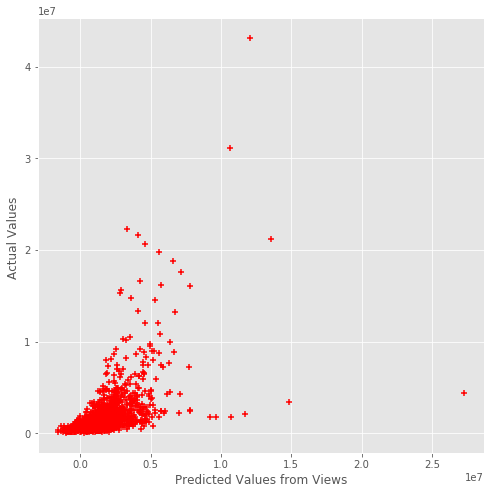

score:  0.28420662042153655


In [101]:
#TEST SET
lmr = Ridge()
lmr.fit(X, y) 

predictions = lmr.predict(X_test)
score = lmr.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

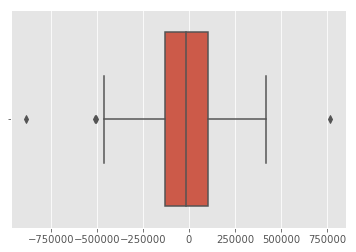

In [102]:
sns.boxplot(lmr.coef_)

In [103]:
lmr.coef_.std()

229251.47500767524

In [104]:
lmr.coef_.mean()

-31466.188615980533

In [105]:
lmr.coef_.max()                                    


768201.5735004195